In [ ]:
#I. Feature Engineering

In [ ]:
#1. Text Normalization

In [3]:
from google.colab import files
upload = files.upload()

Saving .DS_Store to .DS_Store
Saving A1.txt to A1 (1).txt
Saving ada_lovelace.txt to ada_lovelace.txt
Saving alice.zip to alice.zip
Saving Asource.txt to Asource.txt
Saving B1.txt to B1.txt
Saving BOW.ipynb to BOW.ipynb
Saving Bsource.txt to Bsource.txt
Saving C1.txt to C1.txt
Saving coldplay.csv to coldplay.csv
Saving Csource.txt to Csource.txt
Saving D1.txt to D1.txt
Saving D2.txt to D2.txt
Saving Dsource.txt to Dsource.txt
Saving elonmusk_tweets.csv to elonmusk_tweets.csv
Saving feature_engineering_questions.ipynb to feature_engineering_questions.ipynb
Saving GDPR-Compliance.ipynb to GDPR-Compliance.ipynb
Saving headlines.csv to headlines.csv
Saving job-market.csv to job-market.csv
Saving News-Topic-Modelling.ipynb to News-Topic-Modelling.ipynb
Saving Plagiarism.ipynb to Plagiarism.ipynb
Saving Preprocessing.ipynb to Preprocessing.ipynb
Saving quora.ipynb to quora.ipynb
Saving random_headlines.csv to random_headlines.csv
Saving sentiment_analysis_questions.ipynb to sentiment_analysi

In [4]:
import nltk
import numpy as np
import pandas as pd

import re 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [5]:
data = pd.read_csv('elonmusk_tweets.csv')
print(len(data))
data.head()

2819


,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
def normalize(document):
  # TODO: remove punctuation
  text = "".join([ch for ch in document if ch not in string.punctuation])

  #TODO: tokenize text
  tokens = word_tokenize(text)

  #TODO: Stemming
  stemmer = PorterStemmer()
  ret = " ".join([stemmer.stem(word.lower()) for word in tokens])
  return ret

original_documents =  [x.strip() for x in data['text']]
documents = [normalize(d).split() for d in original_documents]
documents[0]

['band', 'so', 'the', 'robot', 'spare', 'human', 'httpstcov7jujqwfcv']

In [ ]:
#2. Implement TF-IDF

In [13]:
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import math

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# Flatten all the documents
flat_list = [word for doc in documents for word in doc]

#TODO: remove stop words from the vocabulary
words = [word for word in flat_list if word not in stopwords.words('english')]

#TODO: We take the 500 most common words only
counts = Counter(words)
vocabulary = counts.most_common(500)
print([x for x in vocabulary if x[0] == 'tesla'])
vocabulary = [x[0] for x in vocabulary]
assert len(vocabulary) == 500

#vocabulary.sort()
vocabulary[:5]

[('tesla', 287)]


['brt', 'tesla', 'spacex', 'model', 'thi']

In [22]:
def idf(vocabulary, documents):
  idf_values = {}
  num_documents = len(documents)
  for term in vocabulary:
    count = sum(term in document for document in documents)
    idf_values[term] = math.log(num_documents /count, 2)
    return idf

idf_values =  idf(vocabulary, documents)
[idf_values[key] for key in vocabulary[:5]]

TypeError: ignored

In [ ]:
#3. Compare the results with the reference implementation of scikit-learn library. 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english', max_features=500)

features = tfidf.fit(original_documents)
corpus_tf_idf = tfidf.transform(original_documents) 

sum_words = corpus_tf_idf.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:5])
print('testla', corpus_tf_idf[1, features.vocabulary_['tesla']])

[('http', 163.54366542841234), ('https', 151.85039944652075), ('rt', 112.61998731390989), ('tesla', 95.96401470715628), ('xe2', 88.20944486346477)]
testla 0.3495243100660956


In [ ]:
#4. Apply TF-IDF for information retrieval 

In [ ]:
def cosine_similarity(v1,v2):
    """TODO: compute cosine similarity"""
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
      x = v1[i]; y = v2[i]
      sumxx += x*x
      sumyy += y*y
      sumxy +=x*y
    if sumxy == 0:
      result = 0
    else:
      result = sumxy/math.sqrt(sumxx*sumyy)
    return result

def search_vec(query, k, vocabulary, stemmer, document_vectors, original_documents):
    q = query.split()
    q = [stemmer.stem(w) for w in q]
    query_vector = vectorize(q, vocabulary, idf)
    
    # TODO: rank the documents by cosine similarity
    scores = [[cosine_similarity(query_vector, document_vectors[d]),d] for d in range(len(document_vectors))]
    scores.sort(key=lambda x: -x[0])
    
    print('Top-{0} documents'.format(k))
    for i in range(k):
        print(i, original_documents[scores[i][1]])

query = "tesla nasa"
stemmer = PorterStemmer()
search_vec(query, 5, vocabulary, stemmer, document_vectors, original_documents)

In [26]:
new_features = tfidf.transform([query])

cosine_similarities = linear_kernel(new_features, corpus_tf_idf).flatten()
related_docs_indices = cosine_similarities.argsort()[::-1]

topk = 5
print('Top-{0} documents'.format(topk))
for i in range(topk):
    print(i, original_documents[related_docs_indices[i]])

Top-5 documents
0 b'@ashwin7002 @NASA @faa @AFPAA We have not ruled that out.'
1 b"SpaceX could not do this without NASA. Can't express enough appreciation. https://t.co/uQpI60zAV7"
2 b'@NASA launched a rocket into the northern lights http://t.co/tR2cSeMV'
3 b'Whatever happens today, we could not have done it without @NASA, but errors are ours alone and me most of all.'
4 b'RT @NASA: Updated @SpaceX #Dragon #ISS rendezvous times: NASA TV coverage begins Sunday at 3:30amET: http://t.co/qrm0Dz4jPE. Grapple at  ...'


In [ ]:
#II. Text Processing

In [ ]:
#1. Preprocessing 

In [27]:
# Import NLTK and all the needed libraries
import nltk
nltk.download('punkt') #Run this line one time to get the resource
nltk.download('stopwords') #Run this line one time to get the resource
nltk.download('wordnet') #Run this line one time to get the resource
nltk.download('averaged_perceptron_tagger') #Run this line one time to get the resource
import numpy as np
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [28]:
# TODO: Load the dataset in coldplay.csv
df=pd.read_csv("coldplay.csv")

In [29]:
# TODO: Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  120 non-null    object
 1   Song    120 non-null    object
 2   Link    120 non-null    object
 3   Lyrics  120 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB


In [30]:
# TODO: Select the song 'Every Teardrop Is A Waterfall'
song_title = 'Every Teardrop Is A Waterfall'
lyrics = df.loc[df['Song'] == song_title, 'Lyrics'].values[0]
print(lyrics)

I turn the music up, I got my records on  
I shut the world outside until the lights come on  
Maybe the streets alight, maybe the trees are gone  
I feel my heart start beating to my favourite song  
  
And all the kids they dance, all the kids all night  
Until Monday morning feels another life  
I turn the music up  
I'm on a roll this time  
And heaven is in sight  
  
I turn the music up, I got my records on  
From underneath the rubble sing a rebel song  
Don't want to see another generation drop  
I'd rather be a comma than a full stop  
  
Maybe I'm in the black, maybe I'm on my knees  
Maybe I'm in the gap between the two trapezes  
But my heart is beating and my pulses start  
Cathedrals in my heart  
  
As we saw oh this light I swear you, emerge blinking into  
To tell me it's alright  
As we soar walls, every siren is a symphony  
And every tear's a waterfall  
Is a waterfall  
Oh  
Is a waterfall  
Oh oh oh  
Is a is a waterfall  
Every tear  
Is a waterfall  
Oh oh oh  


In [31]:
# TODO: Tokenize the lyrics of the song and save the tokens into a variable and print it
import nltk 
import string
from nltk import word_tokenize
words = word_tokenize(lyrics)
print(words)

['I', 'turn', 'the', 'music', 'up', ',', 'I', 'got', 'my', 'records', 'on', 'I', 'shut', 'the', 'world', 'outside', 'until', 'the', 'lights', 'come', 'on', 'Maybe', 'the', 'streets', 'alight', ',', 'maybe', 'the', 'trees', 'are', 'gone', 'I', 'feel', 'my', 'heart', 'start', 'beating', 'to', 'my', 'favourite', 'song', 'And', 'all', 'the', 'kids', 'they', 'dance', ',', 'all', 'the', 'kids', 'all', 'night', 'Until', 'Monday', 'morning', 'feels', 'another', 'life', 'I', 'turn', 'the', 'music', 'up', 'I', "'m", 'on', 'a', 'roll', 'this', 'time', 'And', 'heaven', 'is', 'in', 'sight', 'I', 'turn', 'the', 'music', 'up', ',', 'I', 'got', 'my', 'records', 'on', 'From', 'underneath', 'the', 'rubble', 'sing', 'a', 'rebel', 'song', 'Do', "n't", 'want', 'to', 'see', 'another', 'generation', 'drop', 'I', "'d", 'rather', 'be', 'a', 'comma', 'than', 'a', 'full', 'stop', 'Maybe', 'I', "'m", 'in', 'the', 'black', ',', 'maybe', 'I', "'m", 'on', 'my', 'knees', 'Maybe', 'I', "'m", 'in', 'the', 'gap', 'betwe

In [32]:
# TODO: Remove the punctuation, then save the result into a variable and print it
tokens_without_punctuation = [token for token in words if token not in string.punctuation]
print(tokens_without_punctuation)

['I', 'turn', 'the', 'music', 'up', 'I', 'got', 'my', 'records', 'on', 'I', 'shut', 'the', 'world', 'outside', 'until', 'the', 'lights', 'come', 'on', 'Maybe', 'the', 'streets', 'alight', 'maybe', 'the', 'trees', 'are', 'gone', 'I', 'feel', 'my', 'heart', 'start', 'beating', 'to', 'my', 'favourite', 'song', 'And', 'all', 'the', 'kids', 'they', 'dance', 'all', 'the', 'kids', 'all', 'night', 'Until', 'Monday', 'morning', 'feels', 'another', 'life', 'I', 'turn', 'the', 'music', 'up', 'I', "'m", 'on', 'a', 'roll', 'this', 'time', 'And', 'heaven', 'is', 'in', 'sight', 'I', 'turn', 'the', 'music', 'up', 'I', 'got', 'my', 'records', 'on', 'From', 'underneath', 'the', 'rubble', 'sing', 'a', 'rebel', 'song', 'Do', "n't", 'want', 'to', 'see', 'another', 'generation', 'drop', 'I', "'d", 'rather', 'be', 'a', 'comma', 'than', 'a', 'full', 'stop', 'Maybe', 'I', "'m", 'in', 'the', 'black', 'maybe', 'I', "'m", 'on', 'my', 'knees', 'Maybe', 'I', "'m", 'in', 'the', 'gap', 'between', 'the', 'two', 'trape

In [37]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    output = np.asarray(pos_tag)
    for i in range(len(pos_tag)):
        if pos_tag[i][1].startswith('J'):
            output[i][1] = wordnet.ADJ
        elif pos_tag[i][1].startswith('V'):
            output[i][1] = wordnet.VERB
        elif pos_tag[i][1].startswith('R'):
            output[i][1] = wordnet.ADV
        else:
            output[i][1] = wordnet.NOUN
    return output

In [38]:
#2. Bag-of-words
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
# TODO: Load the dataset in coldplay.csv
df=pd.read_csv("coldplay.csv")

In [40]:
# TODO: Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  120 non-null    object
 1   Song    120 non-null    object
 2   Link    120 non-null    object
 3   Lyrics  120 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB


In [41]:
# TODO: Compute a BOW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(df['Lyrics'])
print(bow.shape)

(120, 1776)


In [43]:
# TODO: Create a new dataframe containing the BOW outputs and the corresponding words as columns. And print it
feature_names = vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(bow.toarray(), columns=feature_names)
bow_df

,10,2000,2gether,76543,aaaaaah,aaaaah,aaaah,about,above,achin,...,yellow,yes,yesterday,yet,you,young,your,yours,yourself,yuletide
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,4,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,16,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,3,0,0,0
116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,0,0,0,0,0
117,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,7,0,4,0,0,0
118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,16,0,1,0,0,0


In [44]:
sum_bow = bow_df.sum()
sum_bow.idxmax()

'you'

In [45]:
# TODO: print the 10 most used word by Coldplay
word_counts = bow_df.sum()
top_10_words = word_counts.nlargest(10)
print (top_10_words)

you    994
the    777
and    650
to     481
it     458
oh     334
in     318
me     314
my     288
on     285
dtype: int64


In [ ]:
#III. Text Similarity

In [46]:
#1. Similarity metrics 
import nltk
import numpy as np
import pandas as pd

In [47]:
A = "Outside the classroom, Stallman pursued his studies with even more diligence, rushing off to fulfill his laboratory-assistant duties at Rockefeller University during the week and dodging the Vietnam protesters on his way to Saturday school at Columbia. It was there, while the rest of the Science Honors Program students sat around discussing their college choices, that Stallman finally took a moment to participate in the preclass bull session."
B = "To facilitate the process, AI Lab hackers had built a system that displayed both the source and display modes on a split screen. Despite this innovative hack, switching from mode to mode was still a nuisance."
C = "With no dorm and no dancing, Stallman's social universe imploded. Like an astronaut experiencing the aftereffects of zero-gravity, Stallman found that his ability to interact with nonhackers, especially female nonhackers, had atrophied significantly. After 16 weeks in the AI Lab, the self confidence he'd been quietly accumulating during his 4 years at Harvard was virtually gone."

In [49]:
# TODO: compute the Jaccard similarities
# Split the sentences
set_A = set(A.lower().split())
set_B = set(B.lower().split())
set_C = set(C.lower().split())
# Compute the intersection and union
intersection_AB = len(set_A.intersection(set_B))
union_AB = len(set_A.union(set_B))

intersection_AC = len(set_A.intersection(set_C))
union_AC = len(set_A.union(set_C))

intersection_BC = len(set_B.intersection(set_C))
union_BC = len(set_B.union(set_C))
# Compute and print the Jaccard Similarity
jaccard_AB = intersection_AB /union_AB
jaccard_AC = intersection_AC /union_AC
jaccard_BC = intersection_BC /union_BC

print("Jaccard Similarity between A and B:", jaccard_AB)
print("Jaccard Similarity between A and C:", jaccard_AC)
print("Jaccard Similarity between B and C:", jaccard_BC)

Jaccard Similarity between A and B: 0.08641975308641975
Jaccard Similarity between A and C: 0.12631578947368421
Jaccard Similarity between B and C: 0.0945945945945946


In [51]:
# TODO: compute the TF-IDF of A, B and C and the cosine similarities of all possibilities
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF for sentences A, B, and C
tfidf = vectorizer.fit_transform([A, B, C])

# Calculate cosine similarities
cosine_sim_AB = cosine_similarity(tfidf[0], tfidf[1])
cosine_sim_BC = cosine_similarity(tfidf[1], tfidf[2])
cosine_sim_AC = cosine_similarity(tfidf[0], tfidf[2])

# Print cosine similarities 
print("cos(A, B):", cosine_sim_AB)
print("cos(B, C):", cosine_sim_BC)
print("cos(A, C):", cosine_sim_AC)

cos(A, B): [[0.1679327]]
cos(B, C): [[0.13618963]]
cos(A, C): [[0.2850296]]


In [ ]:
#2. TF-IDF 

In [52]:
import nltk
import numpy as np
import pandas as pd

In [53]:
# TODO: Load the dataset
df=pd.read_csv("headlines.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   publish_date   1999 non-null   int64 
 1   headline_text  1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [54]:
# TODO: Have a look at the data
df.head(10)

,publish_date,headline_text
0,20170721,algorithms can make decisions on behalf of fed...
1,20170721,andrew forrests fmg to appeal pilbara native t...
2,20170721,a rural mural in thallan
3,20170721,australia church risks becoming haven for abusers
4,20170721,australian company usgfx embroiled in shanghai...
5,20170721,australia suffers shock loss in womens world c...
6,20170721,big rigs
7,20170721,boy charged in connection with supermarket syr...
8,20170721,breaking bad creator vince gilligan on success...
9,20170721,breaking bad creator vince gilligan on walter ...


In [57]:
# TODO: Perform preprocessing
# import needed modules
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string
# Tokenize
df['tokens'] = df['headline_text'].apply(lambda x: word_tokenize(x))

# Remove punctuation
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])

# Remove stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

# Stem
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
df['tokens']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [algorithm, can, make, deci, on, behalf, of, f...
1       [andrew, forrest, fmg, to, appeal, pilbara, na...
2                          [a, rural, mural, in, thallan]
3       [australia, church, risk, becom, haven, for, abu]
4       [australian, compani, usgfx, embroil, in, shan...
                              ...                        
1994    [constitut, avenu, win, top, prize, at, act, a...
1995                         [dark, mofo, number, crunch]
1996    [david, petraeu, say, australia, must, be, fir...
1997    [driverless, car, in, australia, face, challen...
1998          [drug, compani, critici, over, price, hike]
Name: tokens, Length: 1999, dtype: object

In [58]:
# TODO: Compute the BOW of the preprocessed data
vectorizer = CountVectorizer(analyzer=lambda x: x)
vectorizer.fit(df['tokens'])
bow = vectorizer.transform(df['tokens'])
print(bow.shape)

(1999, 4348)


In [ ]:
# TODO: Compute the TF using the BOW
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=lambda x:x)
vectorizer.fit(df['Stem'])
tfidf = vectorizer.transform(df['Stem'])
tfidf_array = tfidf.toarray()
all_zeros = (tfidf_array == 0).all()
if not all_zeros:
  print(tfidf_array[0])

In [63]:
#3. Plagiarism checker 
file = open('A1.txt', 'r') 
A1 = file.readlines()[0]

file = open('Asource.txt', 'r') 
A0 = file.readlines()[0]

file = open('B1.txt', 'r') 
B1 = file.readlines()[0]

file = open('Bsource.txt', 'r') 
B0 = file.readlines()[0]

file = open('C1.txt', 'r') 
C1 = file.readlines()[0]

file = open('Csource.txt', 'r') 
C0 = file.readlines()[0]

file = open('D1.txt', 'r') 
D1 = file.readlines()[0]

file = open('D2.txt', 'r') 
D2 = file.readlines()[0]

file = open('Dsource.txt', 'r') 
D0 = file.readlines()[0]

In [64]:
alldata = [A0, A1, B0, B1, C0, C1, D0, D1, D2]

In [65]:
#TODO: Compute tf-idf for all documents
from sklearn.feature_extraction.text import TfidfVectorizer

tfvect = TfidfVectorizer()
tfvect.fit(alldata)

tfidf = tfvect.fit_transform(alldata).toarray()

TFIDFA = tfvect.transform([A0, A1]).toarray()
TFIDFB = tfvect.transform([B0, B1]).toarray()
TFIDFC = tfvect.transform([C0, C1]).toarray()
TFIDFD = tfvect.transform([D0, D1, D2]).toarray()

In [66]:
#TODO: pair-wise similarity

similarityAA = cosine_similarity(TFIDFA, TFIDFA)
similarityBB = cosine_similarity(TFIDFB, TFIDFB)
similarityCC = cosine_similarity(TFIDFC, TFIDFC)
similarityDD = cosine_similarity(TFIDFD, TFIDFD)

similarityAll = cosine_similarity(tfidf, tfidf)

In [67]:
similarityAA

array([[1.        , 0.81898863],
       [0.81898863, 1.        ]])

In [68]:
similarityBB

array([[1.        , 0.63747903],
       [0.63747903, 1.        ]])

In [69]:
similarityCC

array([[1.        , 0.85723864],
       [0.85723864, 1.        ]])

In [70]:
similarityDD

array([[1.        , 0.92754461, 0.45775827],
       [0.92754461, 1.        , 0.47179638],
       [0.45775827, 0.47179638, 1.        ]])

In [71]:
similarityAll

array([[1.        , 0.81898863, 0.10748497, 0.12736224, 0.24491604,
        0.29501242, 0.2530779 , 0.2146434 , 0.18585492],
       [0.81898863, 1.        , 0.10940658, 0.12644471, 0.21239125,
        0.25583485, 0.214717  , 0.17937458, 0.16807197],
       [0.10748497, 0.10940658, 1.        , 0.63747903, 0.08804551,
        0.09372089, 0.08509508, 0.07946359, 0.10627147],
       [0.12736224, 0.12644471, 0.63747903, 1.        , 0.08730757,
        0.08893992, 0.12527568, 0.1207279 , 0.12910021],
       [0.24491604, 0.21239125, 0.08804551, 0.08730757, 1.        ,
        0.85723864, 0.20151171, 0.16200275, 0.14447728],
       [0.29501242, 0.25583485, 0.09372089, 0.08893992, 0.85723864,
        1.        , 0.22326634, 0.1806631 , 0.1558733 ],
       [0.2530779 , 0.214717  , 0.08509508, 0.12527568, 0.20151171,
        0.22326634, 1.        , 0.92754461, 0.45775827],
       [0.2146434 , 0.17937458, 0.07946359, 0.1207279 , 0.16200275,
        0.1806631 , 0.92754461, 1.        , 0.47179638],


In [72]:
import matplotlib.pyplot as plt

#TODO: show pair-wise similarity
pred_plagiarism = similarityAll>0.2

def plot_similarity(similarity_matrix):
  plt.figure(figsize=(8, 6))
  plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
  plt.colorbar()
  plt.title('Pairwise Similarity')
  plt.xlabel('Document Index')
  plt.ylabel('Document Index')
  plt.show()

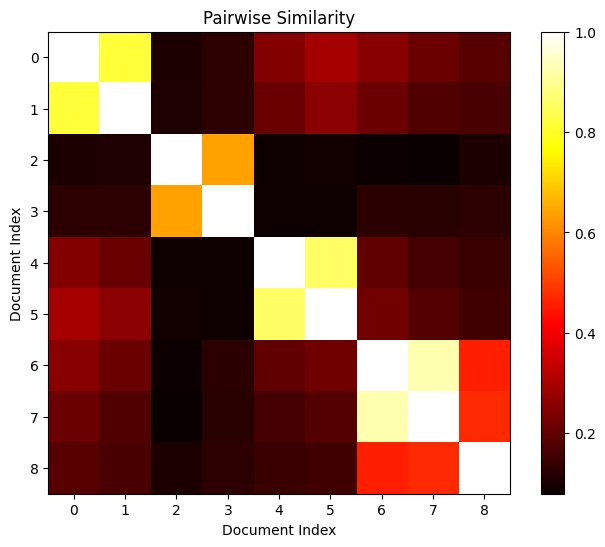

In [73]:
plot_similarity(similarityAll)

In [74]:
import numpy as np
real_plagiarism = np.zeros((9,9))

In [76]:
real_plagiarism[0:2, 0:2] = 1
real_plagiarism[2:4, 2:4] = 1
real_plagiarism[4:6, 4:6] = 1
real_plagiarism[6:9, 6:9] = 1

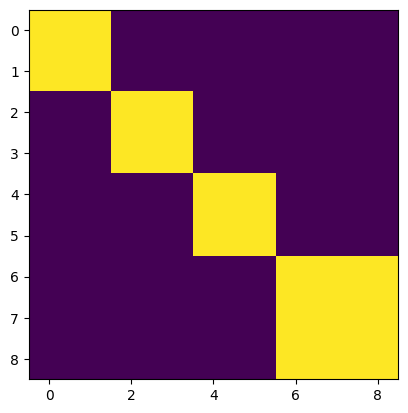

In [77]:
import matplotlib.pyplot as plt
plt.imshow(real_plagiarism)
plt.show()

In [ ]:
#III. Text Classification 

In [62]:
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# TODO: Load the dataset 
df=pd.read_csv("headlines.csv")

# TODO: explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   publish_date   1999 non-null   int64 
 1   headline_text  1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [78]:
# TODO: Perform preprocessing over all the text
df.head(10)

,publish_date,headline_text
0,20170721,algorithms can make decisions on behalf of fed...
1,20170721,andrew forrests fmg to appeal pilbara native t...
2,20170721,a rural mural in thallan
3,20170721,australia church risks becoming haven for abusers
4,20170721,australian company usgfx embroiled in shanghai...
5,20170721,australia suffers shock loss in womens world c...
6,20170721,big rigs
7,20170721,boy charged in connection with supermarket syr...
8,20170721,breaking bad creator vince gilligan on success...
9,20170721,breaking bad creator vince gilligan on walter ...


In [79]:
#IV. Topic Modelling 
# TODO: import needed libraries
import numpy as np
import pandas as pd

# TODO: Load the dataset 
df=pd.read_csv("random_headlines.csv")
df.head(10)

,publish_date,headline_text
0,20120305,ute driver hurt in intersection crash
1,20081128,6yo dies in cycling accident
2,20090325,bumper olive harvest expected
3,20100201,replica replaces northernmost sign
4,20080225,woods targets perfect season
5,20091120,leckie salvages dramatic draw for adelaide
6,20031024,group to gauge rail services future
7,20130304,anti hunting rally still going ahead
8,20081115,dr congo refugees receive first aid
9,20130304,thailand signs agreement with muslim rebels


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   publish_date   20000 non-null  int64 
 1   headline_text  20000 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [81]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

In [82]:
df['lowercase'] = df['headline_text'].str.lower()
df['tokens'] = df['lowercase'].apply(word_tokenize)
df['no_punctuation'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])
stopwords_set = set(stopwords.words('english'))
df['no_stopwords'] = df['no_punctuation'].apply(lambda tokens: [token for token in tokens if token not in stopwords_set])
stemmer = PorterStemmer()
df['stemmed'] = df['no_stopwords'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
df['stemmed']

0                    [ute, driver, hurt, intersect, crash]
1                                  [6yo, die, cycl, accid]
2                          [bumper, oliv, harvest, expect]
3                    [replica, replac, northernmost, sign]
4                          [wood, target, perfect, season]
                               ...                        
19995               [judg, attack, walkinshaw, run, arrow]
19996           [polish, govt, collaps, elect, held, next]
19997                              [drum, friday, may, 29]
19998            [winterbottom, bathurst, provision, pole]
19999    [pull, pork, pawpaw, salad, local, success, st...
Name: stemmed, Length: 20000, dtype: object

In [83]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
# TODO: Compute the BOW using Gensim
from gensim.corpora import Dictionary
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(token)for token in tokens])
dictionary = Dictionary(df['stemmed'])
dictionary.filter_extremes(no_below=5, no_above=0.5)
df['bow'] = df['stemmed'].apply(lambda tokens: dictionary.doc2bow(tokens))
df['bow']

0                         [(0, 1), (1, 1), (2, 1), (3, 1)]
1                                 [(4, 1), (5, 1), (6, 1)]
2                                 [(7, 1), (8, 1), (9, 1)]
3                                       [(10, 1), (11, 1)]
4                     [(12, 1), (13, 1), (14, 1), (15, 1)]
                               ...                        
19995                        [(94, 1), (612, 1), (791, 1)]
19996    [(306, 1), (502, 1), (1125, 1), (1279, 1), (16...
19997            [(122, 1), (362, 1), (435, 1), (1929, 1)]
19998                                [(129, 1), (2498, 1)]
19999    [(767, 1), (1327, 1), (1500, 1), (1927, 1), (2...
Name: bow, Length: 20000, dtype: object

In [89]:
# TODO: Compute TF-IDF
from gensim.models import TfidfModel
dictionary = Dictionary(df['stemmed'])
dictionary.filter_extremes(no_below=5, no_above=0.5)
df['bow'] = df['stemmed'].apply(lambda tokens: dictionary.doc2bow(tokens))
bow_corpus = df['bow'].tolist()
tfidf_model = TfidfModel(bow_corpus)
df['tfidf'] = df['bow'].apply(lambda bow: tfidf_model[bow])
df['tfidf']

0        [(0, 0.38380472505678387), (1, 0.4408152091819...
1        [(4, 0.565040562691219), (5, 0.678282623325040...
2        [(7, 0.4778523954688469), (8, 0.56145873585743...
3        [(10, 0.7596694993542321), (11, 0.650309350809...
4        [(12, 0.5937887452228604), (13, 0.432499245079...
                               ...                        
19995    [(94, 0.6788936377183876), (612, 0.47999246040...
19996    [(306, 0.3169859350661769), (502, 0.2621260609...
19997    [(122, 0.37474224836119696), (362, 0.485431117...
19998    [(129, 0.6582992963848873), (2498, 0.752756292...
19999    [(767, 0.43161038088504416), (1327, 0.42560245...
Name: tfidf, Length: 20000, dtype: object

In [90]:
# TODO: Compute LSA
from gensim.models import LsiModel
df['tfidf'] = df['bow'].apply(lambda bow: tfidf_model[bow])
lsa_model = LsiModel(df['tfidf'], num_topics=10, id2word=dictionary)
df['lsa'] = df['tfidf'].apply(lambda tfidf: lsa_model[tfidf])
df['lsa']

0        [(0, -0.0012701898724714038), (1, -0.075401833...
1        [(0, -0.003939340878472768), (1, -0.0603660661...
2        [(0, -0.0008274848985907174), (1, -0.008559378...
3        [(0, -0.0015637816674852394), (1, -0.012035026...
4        [(0, -0.00040069159463679093), (1, -0.01427069...
                               ...                        
19995    [(0, -0.002165816181091471), (1, -0.0754060495...
19996    [(0, -0.0022641097781515456), (1, -0.039152162...
19997    [(0, -0.0009337556819351766), (1, -0.015020401...
19998    [(0, -7.837256925591064e-05), (1, -0.001856483...
19999    [(0, -0.0009627099428497515), (1, -0.011771547...
Name: lsa, Length: 20000, dtype: object

In [93]:
# TODO: Print the 3 or 4 most significant words of each topic
for topic_id, topic in lsa_model.show_topics(num_topics=10, num_words=4, formatted=False):
  words = [f"{word}: {weight:3f}" for word, weight in topic]
  topic_str = f"({topic_id}, '{', '.join(words)}')"
  print(topic_str)

(0, 'interview: -0.989375, michael: -0.057942, extend: -0.040646, andrew: -0.036966')
(1, 'man: -0.464619, polic: -0.387231, charg: -0.320482, court: -0.158374')
(2, 'man: 0.446545, charg: 0.312002, plan: -0.247651, new: -0.221970')
(3, 'polic: 0.748608, charg: -0.227522, man: -0.216722, second: -0.156556')
(4, 'second: -0.443306, 90: -0.401358, abc: -0.381869, news: -0.355473')
(5, 'new: -0.825183, plan: 0.201826, council: 0.175209, win: -0.120344')
(6, 'fire: 0.418807, crash: 0.314845, kill: 0.278791, die: 0.264707')
(7, 'fire: -0.667833, crash: 0.279062, plan: 0.247439, die: 0.221490')
(8, 'win: 0.424576, plan: -0.407191, court: 0.282243, new: -0.278825')
(9, 'court: -0.492138, charg: 0.456234, win: 0.383215, face: -0.242787')


In [94]:
# TODO: Compute LDA
from gensim.models import LdaModel
lda_model = LdaModel(df['tfidf'], num_topics=10, id2word=dictionary)
df['lda'] = df['tfidf'].apply(lambda tfidf: lda_model[tfidf])
df['lda']

0        [(0, 0.033700395), (1, 0.033689767), (2, 0.033...
1        [(0, 0.036861207), (1, 0.03686032), (2, 0.0368...
2        [(0, 0.036841094), (1, 0.036840066), (2, 0.036...
3        [(0, 0.041495584), (1, 0.041495416), (2, 0.041...
4        [(0, 0.03353637), (1, 0.033541553), (2, 0.0335...
                               ...                        
19995    [(0, 0.03686706), (1, 0.03686004), (2, 0.40276...
19996    [(0, 0.03406585), (1, 0.034067094), (2, 0.0340...
19997    [(0, 0.033689167), (1, 0.03368751), (2, 0.0336...
19998    [(0, 0.041483417), (1, 0.041483417), (2, 0.314...
19999    [(0, 0.163276), (1, 0.031083573), (2, 0.289096...
Name: lda, Length: 20000, dtype: object

In [96]:
# TODO: print the most frequent words of each topic
for topic_id, topic in lda_model.show_topics(num_topics=10, num_words=3, formatted=False):
  words = [f"{word}: {weight:3f}" for word, weight in topic]
  topic_str = f"({topic_id}, '{', '.join(words)}')"
  print(topic_str)

(0, 'miss: 0.013972, search: 0.012032, review: 0.010947')
(1, 'found: 0.011671, group: 0.010034, charg: 0.009669')
(2, 'interview: 0.034346, abc: 0.017717, second: 0.017606')
(3, 'crash: 0.013959, kill: 0.012886, assault: 0.009328')
(4, 'injur: 0.009023, state: 0.008255, drought: 0.007442')
(5, 'rate: 0.010518, council: 0.009309, final: 0.008765')
(6, 'test: 0.013996, alleg: 0.008982, show: 0.008669')
(7, 'coast: 0.011252, safeti: 0.010228, arrest: 0.008897')
(8, 'face: 0.009685, accus: 0.008792, countri: 0.008545')
(9, 'name: 0.010784, control: 0.007956, fire: 0.007886')


In [99]:
#V. Named Entity Recognition 

# TODO: Load the dataset 
adafile = "ada_lovelace.txt"

In [100]:
#Q1
import spacy
def identify_entities(filename):
  nlp = spacy.load("en_core_web_sm")
  with open(filename, 'r') as file:
    contents = file.read()
    doc = nlp(contents)
    for entity in doc.ents:
      print(entity.text, entity.label_)
identify_entities(adafile)

Augusta Ada King PERSON
Countess PERSON
Lovelace PERSON
Byron ORG
10 December 1815 DATE
27 November 1852 DATE
English LANGUAGE
Charles Babbage's ORG
the Analytical Engine ORG
first ORDINAL
first ORDINAL
first ORDINAL
one CARDINAL
first ORDINAL
Lovelace PERSON
Mary Somerville PERSON
Charles Babbage PERSON
1833 DATE
Somerville GPE
many years DATE
Andrew Crosse PERSON
David Brewster PERSON
Charles Wheatstone PERSON
Michael Faraday PERSON
Charles Dickens PERSON


In [101]:
#Q2
import spacy
from spacy import displacy
from IPython.display import display
def visualize_entities(filename):
  nlp = spacy.load("en_core_web_sm")
  with open(filename, 'r') as file:
    contents = file.read()
    doc = nlp(contents)
    displacy.render(doc, style="ent", jupyter=True)
visualize_entities(adafile)

In [102]:
#Q3
import spacy
def replace_name_by_redacted(filename):
  nlp = spacy.load("en_core_web_sm")
  with open(filename, 'r') as file:
    contents = file.read()
    doc = nlp(contents)
    redacted_contents = contents
    for entity in doc.ents:
      if entity.label_ == "PERSON":
        redacted_contents = redacted_contents.replace(entity.text, "[REDACTED]")
      with open(filename, 'w') as file:
        file.write(redacted_contents)
replace_name_by_redacted(adafile)

In [103]:
#Q4
import spacy
def make_doc_GDPR_compliant(filename):
  nlp = spacy.load("en_core_web_sm")
  with open(filename, 'r') as file:
    contents = file.read()
    doc = nlp(contents)
    redacted_contents = contents
    for entity in doc.ents:
      if entity.label_ == "PERSON":
        redacted_contents = redacted_contents.replace(entity.text, "[REDACTED]")
      with open(filename, 'w') as file:
        file.write(redacted_contents)
make_doc_GDPR_compliant(adafile)

In [ ]:
#VI. Exercise 

In [105]:
#Exercise1
jobmarket = "job-market.csv"

jobs_df = pd.read_csv(jobmarket)

jobs_df.fillna(0)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,0,0.0,30.0,0
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,0,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,0,0.0,30.0,0
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,0,0.0,30.0,0
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,0,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,0,0.0,30.0,0
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",0,0.0,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40784,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
40785,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
40786,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
40787,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
